Aim: Implement Decsion Tree classifier
• Implement Decision Tree classifier using scikit learn library
• Test the classifier for Weather dataset

In [33]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [34]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny',
'Overcast',
'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast',
'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal'
,'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']
#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [35]:
le = preprocessing.LabelEncoder()
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")
print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)


Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [36]:
features=list(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

Features: [(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features,Play_encoded , test_size=0.3, random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[(2, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (1, 1, 0, 0), (1, 2, 1, 1), (1, 2, 0, 0), (2, 2, 0, 0), (2, 2, 0, 1), (1, 0, 1, 0)]
[(0, 2, 0, 1), (0, 1, 1, 0), (2, 0, 1, 1), (1, 1, 0, 1), (2, 2, 1, 0)]
[1 1 1 0 1 0 1 0 1]
[1 1 0 0 1]


In [39]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 0 1]


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

[[1 1]
 [0 3]]
precision: 0.75
recall: 1.0


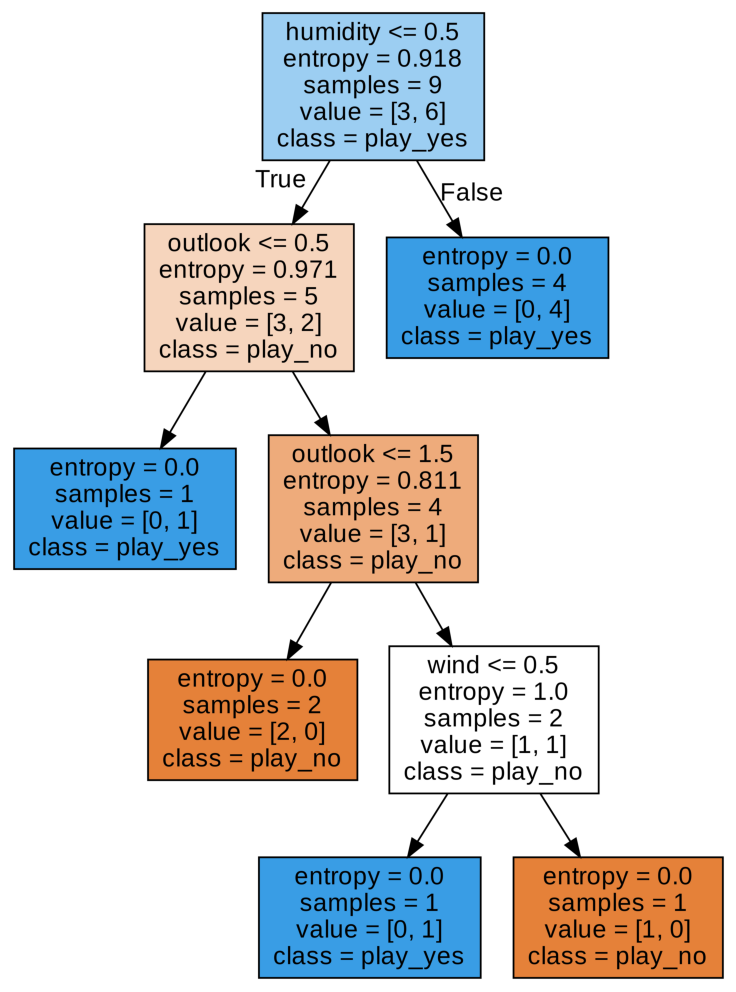

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree_entropy.dot',
feature_names=['outlook','temperature','humidity','wind'],
class_names=['play_no','play_yes'],
filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png',
'-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


2_DT_Iris


In [42]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()


In [43]:
# print the names of the 4 features
print("Features:",iris.feature_names)
# print the label type of iris(class_0, class_1, class_2)
print("Labels:",iris.target_names)
# print data(feature)shape
print("\nData shape: ",iris.data.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']

Data shape:  (150, 4)


In [44]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target , test_size=0.3, random_state=100)

In [45]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


In [46]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [47]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='iris_tree.dot',feature_names=list(iris.feature_names),class_names=list(iris.target_names), filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

0

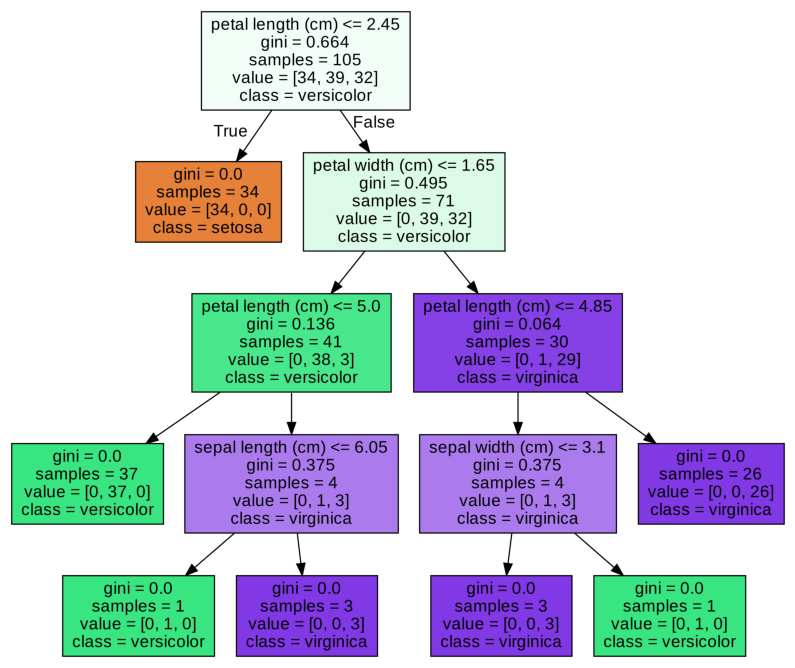

In [48]:
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()
